## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib_venn import venn2

from collections import Counter
from pprint import pprint

import os
from math import log

## Load Data

### Load Interactions Data

In [2]:
interactions_df = pd.read_csv('../data/users_interactions.csv')
interactions_df.fillna('UNKOWN', inplace=True)
interactions_df.shape

(72312, 8)

In [3]:
interactions_df.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,UNKOWN,UNKOWN,UNKOWN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,UNKOWN,UNKOWN,UNKOWN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,UNKOWN,UNKOWN,UNKOWN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,UNKOWN,UNKOWN,UNKOWN


#### Drop Columns/Features not used

In [4]:
interactions_df.drop(['userAgent', 'userRegion', 'userCountry'], axis=1, inplace=True)
interactions_df.head()

,timestamp,eventType,contentId,personId,sessionId
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714


In [5]:
interactions_df.shape

(72312, 5)

#### Observe TimeStamp is not unique key

In [6]:
# i_timestamp = interactions_df.groupby('timestamp').size()
# i_timestamp[i_timestamp > 1].sort_values(ascending=False)

In [7]:
interactions_df[interactions_df['timestamp'] == 1464315825]

,timestamp,eventType,contentId,personId,sessionId
35441,1464315825,BOOKMARK,1031060816592502094,1116121227607581999,5983514973000434140
35443,1464315825,BOOKMARK,-4095842175692097942,1116121227607581999,5983514973000434140
35458,1464315825,BOOKMARK,-7331393944609614247,1116121227607581999,5983514973000434140
35464,1464315825,VIEW,8396284143617057811,1116121227607581999,5983514973000434140
35469,1464315825,BOOKMARK,817467807875770568,1116121227607581999,5983514973000434140
35473,1464315825,BOOKMARK,-3954182109690207118,1116121227607581999,5983514973000434140
35480,1464315825,BOOKMARK,-6792965795755857419,1116121227607581999,5983514973000434140


#### Infer Unique Key ('sessionId', 'personId', 'contentId')

In [8]:
# ii_df = interactions_df.set_index(['sessionId', 'personId', 'contentId'])
# ii_df.head()

In [9]:
# ii_df.shape

### Load Articles Data

In [10]:
articles_df = pd.read_csv('../data/shared_articles.csv')
articles_df.fillna('UNKOWN', inplace=True)
articles_df.shape

(3122, 13)

In [11]:
articles_df.head()

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,UNKOWN,UNKOWN,UNKOWN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,UNKOWN,UNKOWN,UNKOWN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


#### Drop Columns/Features not used

In [12]:
articles_df = articles_df[['contentId', 'eventType', 'lang']]
articles_df.head()

,contentId,eventType,lang
0,-6451309518266745024,CONTENT REMOVED,en
1,-4110354420726924665,CONTENT SHARED,en
2,-7292285110016212249,CONTENT SHARED,en
3,-6151852268067518688,CONTENT SHARED,en
4,2448026894306402386,CONTENT SHARED,en


In [13]:
articles_df.shape

(3122, 3)

### Get Metadata of Articles which are shared

In [14]:
shared_articles_df = articles_df[articles_df['eventType'] == 'CONTENT SHARED']
shared_articles_df.shape

(3047, 3)

In [15]:
shared_articles_df.head()

,contentId,eventType,lang
1,-4110354420726924665,CONTENT SHARED,en
2,-7292285110016212249,CONTENT SHARED,en
3,-6151852268067518688,CONTENT SHARED,en
4,2448026894306402386,CONTENT SHARED,en
5,-2826566343807132236,CONTENT SHARED,en


In [16]:
shared_articles_df.drop(['eventType'], axis=1, inplace=True)
shared_articles_df.head()

/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,contentId,lang
1,-4110354420726924665,en
2,-7292285110016212249,en
3,-6151852268067518688,en
4,2448026894306402386,en
5,-2826566343807132236,en


In [17]:
shared_articles_df.shape

(3047, 2)

In [18]:
interactions_meta_df = interactions_df.merge(shared_articles_df, 
                                              how='left',
                                              on='contentId',
                                              suffixes=('_interaction', '_article')
                                             )
interactions_meta_df.shape

(72312, 6)

In [19]:
interactions_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId,lang
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,en
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,en
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,pt
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,pt
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,en


In [20]:
interactions_meta_df['lang'].value_counts()

en    47041
pt    25133
la       54
ja       34
es        7
Name: lang, dtype: int64

In [21]:
# interactions_meta_df[interactions_meta_df['lang'] == 'pt']['url'].to_dict()

### Filter Interactions in English
#### To get intuition about articles rec and aid in Topic Modelling

In [22]:
interactions_eng_meta_df = interactions_meta_df[interactions_meta_df['lang'] == 'en']

In [23]:
interactions_eng_meta_df.shape

(47041, 6)

In [24]:
interactions_eng_meta_df.drop(['lang'], axis=1, inplace=True)
interactions_eng_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524


In [25]:
interactions_eng_meta_df.shape

(47041, 5)

### Convert TimeStamp to DateTime

In [26]:
interactions_eng_meta_df.loc[:, 'datetime'] = interactions_eng_meta_df['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s'))
interactions_eng_meta_df.head()

/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,timestamp,eventType,contentId,personId,sessionId,datetime
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,2016-06-08 19:10:32
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,2016-06-08 19:02:40
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,2016-06-08 18:58:10
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,2016-06-08 19:44:26
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,2016-06-08 19:22:51


In [27]:
interactions_eng_meta_df['datetime'].describe()

count                   47041
unique                  44782
top       2016-06-13 14:51:58
freq                        4
first     2016-03-28 20:03:20
last      2017-02-28 19:21:51
Name: datetime, dtype: object

In [28]:
interactions_eng_meta_df.loc[:, 'year'] = interactions_eng_meta_df['datetime'].dt.year
interactions_eng_meta_df.loc[:, 'quarter'] = interactions_eng_meta_df['datetime'].dt.to_period("Q")
interactions_eng_meta_df.loc[:, 'month'] = interactions_eng_meta_df['datetime'].dt.to_period("M")

In [29]:
interactions_eng_meta_df.head()

,timestamp,eventType,contentId,personId,sessionId,datetime,year,quarter,month
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,2016-06-08 19:10:32,2016,2016Q2,2016-06
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,2016-06-08 19:02:40,2016,2016Q2,2016-06
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,2016-06-08 18:58:10,2016,2016Q2,2016-06
7,1465415066,VIEW,-1492913151930215984,4254153380739593270,8743229464706506141,2016-06-08 19:44:26,2016,2016Q2,2016-06
9,1465413771,VIEW,3064370296170038610,3609194402293569455,1143207167886864524,2016-06-08 19:22:51,2016,2016Q2,2016-06


## Data Distribution across Time Periods

In [30]:
interactions_eng_meta_df['year'].value_counts()

2016    43412
2017     3629
Name: year, dtype: int64

In [31]:
interactions_eng_meta_df['quarter'].value_counts().sort_index()

2016Q1      743
2016Q2    22314
2016Q3    13696
2016Q4     6659
2017Q1     3629
Freq: Q-DEC, Name: quarter, dtype: int64

In [32]:
interactions_eng_meta_df['month'].value_counts().sort_index()

2016-03      743
2016-04     4920
2016-05     6062
2016-06    11332
2016-07     4317
2016-08     5450
2016-09     3929
2016-10     3460
2016-11     1719
2016-12     1480
2017-01     1547
2017-02     2082
Freq: M, Name: month, dtype: int64

## Type of Interactions

In [33]:
interactions_eng_meta_df['eventType'].value_counts()

VIEW               39823
LIKE                3431
BOOKMARK            1847
COMMENT CREATED     1038
FOLLOW               902
Name: eventType, dtype: int64

In [34]:
interactions_eng_meta_df['eventType'].value_counts()/ len(interactions_eng_meta_df) * 100

VIEW               84.655938
LIKE                7.293637
BOOKMARK            3.926362
COMMENT CREATED     2.206586
FOLLOW              1.917476
Name: eventType, dtype: float64

As there are different interactions types, we associate them with a weight or strength, assuming that, for example, a comment in an article indicates a higher interest of the user on the item than a like, or than a simple view.

In [35]:
event_type_strength_dict = {
   'VIEW': 1.0,
   'LIKE': 2.0, 
   'BOOKMARK': 2.5, 
   'FOLLOW': 3.0,
   'COMMENT CREATED': 4.0,  
}

interactions_eng_meta_df.loc[:, 'eventStrength'] = interactions_eng_meta_df['eventType'].\
                                                    apply(lambda x: event_type_strength_dict[x])

/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/ravi/recommendation_system/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
interactions_eng_meta_df['eventStrength'].value_counts()

1.0    39823
2.0     3431
2.5     1847
4.0     1038
3.0      902
Name: eventStrength, dtype: int64

### Sort By Interaction TimeStamp

In [37]:
sorted_interactions_eng_meta_df = interactions_eng_meta_df.sort_values('timestamp', ascending=True)

In [38]:
for _id, df in sorted_interactions_eng_meta_df.groupby(['personId', 'contentId']):
    if len(df) > 3:
        print(_id)
        print(df)
        break

(-9156344805277471150, -3206777048078326150)
        timestamp        eventType            contentId             personId  \
12904  1463684167             VIEW -3206777048078326150 -9156344805277471150   
12908  1463684612  COMMENT CREATED -3206777048078326150 -9156344805277471150   
3810   1463689402             VIEW -3206777048078326150 -9156344805277471150   
11459  1463695228             VIEW -3206777048078326150 -9156344805277471150   
23914  1463725997             VIEW -3206777048078326150 -9156344805277471150   
23912  1463726178  COMMENT CREATED -3206777048078326150 -9156344805277471150   
10653  1463772991             VIEW -3206777048078326150 -9156344805277471150   

                 sessionId            datetime  year quarter    month  \
12904   150994502476287038 2016-05-19 18:56:07  2016  2016Q2  2016-05   
12908   150994502476287038 2016-05-19 19:03:32  2016  2016Q2  2016-05   
3810    150994502476287038 2016-05-19 20:23:22  2016  2016Q2  2016-05   
11459   15099450247628

## Total User, Item Counts

In [39]:
sorted_interactions_eng_meta_df.shape

(47041, 10)

In [40]:
#No of Users
no_of_users = len(sorted_interactions_eng_meta_df['personId'].unique())
no_of_users

1644

In [41]:
#No of Items
no_of_items = len(sorted_interactions_eng_meta_df['contentId'].unique())
no_of_items

2149

## Generate DataSets across Time Periods

### Form User Groups based on number of items interacted

In [115]:
def get_users_items(df, user_id_col, item_id_col):
    return df.groupby(user_id_col)[item_id_col].unique()

def get_users_no_of_items(df, user_id_col, item_id_col):
    users_items = get_users_items(df, user_id_col, item_id_col)
    users_no_of_items = users_items.apply(lambda x: len(x))
    return users_no_of_items

def get_user_groups(df, user_id_col, item_id_col):
    users_no_of_items = get_users_no_of_items(df, user_id_col, item_id_col)
    users_no_of_items_dist = users_no_of_items.describe()
    # print(users_no_of_items_dist)
    quartiles = []
    if users_no_of_items_dist['min'] != users_no_of_items_dist['25%']:
        quartiles.append((users_no_of_items_dist['min'], users_no_of_items_dist['25%']))
    if users_no_of_items_dist['25%'] != users_no_of_items_dist['50%']:
        quartiles.append((users_no_of_items_dist['25%'], users_no_of_items_dist['50%']))
    if users_no_of_items_dist['50%'] != users_no_of_items_dist['75%']:
        quartiles.append((users_no_of_items_dist['50%'], users_no_of_items_dist['75%']))
    if users_no_of_items_dist['75%'] != users_no_of_items_dist['max']:
        quartiles.append((users_no_of_items_dist['75%'], users_no_of_items_dist['max']+1))
    # print(quartiles)
    
    #all_users_set = set()
    user_groups = []
    i = 0 
    for quartile in quartiles:
        min_items, max_items = quartile
        user_group = dict()
        user_group['grp_id'] = 'user_grp_' + str(i+1)
        i += 1
        user_group['usage'] = '{:3d}  <= no_of_items <  {}'.format(int(min_items), int(max_items))        
        user_group['users'] = set(users_no_of_items[(users_no_of_items>=min_items) & \
                                                    (users_no_of_items<max_items)].index)
        user_group['no_of_users'] = len(user_group['users'])
        #all_users_set = all_users_set.union(user_group['users'])

        print("\t", user_group['grp_id'], ' ', user_group['no_of_users'], ' users interacted with ', user_group['usage'])
        user_groups.append(user_group)
                                    
    
    #print("Total No of Users : ", len(all_users_set))
    return user_groups

In [57]:
# get_users_items(sorted_interactions_eng_meta_df, 'personId', 'contentId')

In [95]:
# users_no_of_items = get_users_no_of_items(sorted_interactions_eng_meta_df, 'personId', 'contentId')
# users_no_of_items

In [116]:
get_user_groups(sorted_interactions_eng_meta_df, 'personId', 'contentId')

	 user_grp_1   367  users interacted with    1  <= no_of_items <  2
	 user_grp_2   382  users interacted with    2  <= no_of_items <  4
	 user_grp_3   461  users interacted with    4  <= no_of_items <  13
	 user_grp_4   434  users interacted with   13  <= no_of_items <  671


[{'grp_id': 'user_grp_1',
  'usage': '  1  <= no_of_items <  2',
  'users': {-9196668942822132778,
   -9150583489352258206,
   -9099478998637725255,
   -9048557723087354030,
   -9012030317377670760,
   -8985529623369322698,
   -8984152171875293281,
   -8965597312806628567,
   -8765011947844411605,
   -8743976205985209861,
   -8632760515877149847,
   -8625026691457884033,
   -8571236143575825977,
   -8531270379574423340,
   -8486803825457737124,
   -8464996041856312914,
   -8403810558207260021,
   -8309025352777181908,
   -8297991392336681667,
   -8123627990288459252,
   -8093198092490224964,
   -8092995968448142037,
   -8077293301545760758,
   -8017805007838352081,
   -7980653669913930599,
   -7920036110689552764,
   -7831984182146287504,
   -7815718986451468962,
   -7809948905251597216,
   -7710821129340169657,
   -7701472666189863533,
   -7690117130547105283,
   -7675499124820917865,
   -7644859828368354114,
   -7638765793642144378,
   -7571302107141581195,
   -7472538368234044044,
 

In Deskdrop, users are allowed to view an article many times, and interact with them in different ways (eg. like or comment). Thus, to model the user interest on a given article, we aggregate all the interactions the user has performed in an item by a weighted sum of interaction type strength and apply a log transformation to smooth the distribution.

In [42]:
def smooth_user_preference(x):
    return round(log(1+x, 2), 4)

def estimate_preference(df, user_col, item_col, event_strength):    
    #print(df.shape)
    
    aggregated_df = df.groupby([user_col, item_col])[event_strength].sum() \
                      .apply(smooth_user_preference).reset_index()
    aggregated_df.rename(columns={event_strength: 'preference'}, inplace=True)    
    #print(aggregated_df.shape)
    
    preferences_df = df.merge(aggregated_df, on=[user_col, item_col], how='left')
    #print(preferences_df.shape)
    
    return preferences_df

def get_aggregated_preferences(df, user_col, item_col, event_strength):    
    #print(df.shape)
    
    aggregated_df = df.groupby([user_col, item_col])[event_strength].sum() \
                      .apply(smooth_user_preference).reset_index()
    aggregated_df.rename(columns={event_strength: 'preference'}, inplace=True)    
    #print(aggregated_df.shape)
    
    return aggregated_df

In [117]:
def generate_datasets(interactions_df, period_col, user_col, item_col, datasets_dir):
    if not os.path.exists(datasets_dir):
        os.makedirs(datasets_dir)
    periods = interactions_df[period_col].value_counts().sort_index().index

    for period in periods:        
        count = len(interactions_df[interactions_df[period_col] == period])
        print("interactions_count in {} : {}".format(period, count))        
    print()
    
    no_of_datasets = 0
    for i, period in enumerate(periods):
        elapsed_periods = list(periods[:i])
        elapsed_periods.append(period)
        
        # print(elapsed_periods)
        print("elapsed_" + period_col + "s   : ", [str(period) for period in elapsed_periods])
        interactions_during_elapsed_periods_df = interactions_df[interactions_df[period_col].isin(elapsed_periods)]
        print("interactions_count : ", len(interactions_during_elapsed_periods_df))
        
        users_count = len(interactions_during_elapsed_periods_df[user_col].unique())
        items_count = len(interactions_during_elapsed_periods_df[item_col].unique())
        print("users_count        :  {}\nitems_count        :  {}".format(users_count, items_count))        
        print()
        
        no_of_elapsed_periods = len(elapsed_periods)
        if no_of_elapsed_periods > 1:
            train_periods = elapsed_periods[:no_of_elapsed_periods-1] #except last period
            test_period = elapsed_periods[-1] #last period
            
            no_of_datasets += 1
            dataset_name = 'dataset_' + str(no_of_datasets)
            print("Generating Dataset : ", dataset_name)
            dataset_dir = os.path.join(datasets_dir, dataset_name)
            if not os.path.exists(dataset_dir):
                os.makedirs(dataset_dir)

            #################################################################################################
            # print("Train {} : {}".format(period_col, train_periods))
            print("Train {} : {}".format(period_col, [str(period) for period in train_periods]))
            interactions_during_train_periods_df = interactions_df[interactions_df[period_col].isin(train_periods)]
            #train_df = estimate_preference(interactions_during_train_periods_df,
            #                               user_col, item_col, 'eventStrength')
            train_df = get_aggregated_preferences(interactions_during_train_periods_df,
                                                  user_col, item_col, 'eventStrength')
            train_periods_str = '_'.join([str(period) for period in train_periods])
            train_file_name = 'train_' + train_periods_str + '.csv'
            train_file_path = os.path.join(dataset_dir, train_file_name)
            #interactions_during_train_periods_df.to_csv(train_file_path, index=False)
            train_df.to_csv(train_file_path, index=False)
            
            print("\t interactions_count : ", len(train_df))
            users_count = len(train_df[user_col].unique())
            items_count = len(train_df[item_col].unique())
            print("\t users_count        :  {}\n\t items_count        :  {}".format(users_count, items_count))            
            #################################################################################################            
            print("Test  {} : {}".format(period_col, test_period))
            interactions_during_test_periods_df = interactions_df[interactions_df[period_col].isin([test_period])]
            #test_df = estimate_preference(interactions_during_test_periods_df,
            #                              user_col, item_col, 'eventStrength')
            test_df = get_aggregated_preferences(interactions_during_test_periods_df,
                                                 user_col, item_col, 'eventStrength')
            
            test_period_str = str(test_period)
            test_file_name = 'test_' + test_period_str + '.csv'
            test_file_path = os.path.join(dataset_dir, test_file_name)
            #interactions_during_test_periods_df.to_csv(test_file_path, index=False)
            test_df.to_csv(test_file_path, index=False)                        
            
            print("\t interactions_count : ", len(test_df))
            users_count = len(test_df[user_col].unique())
            items_count = len(test_df[item_col].unique())
            print("\t users_count        :  {}\n\t items_count        :  {}".format(users_count, items_count))            
            
            print("Test User Groups:")
            user_groups = get_user_groups(test_df, 'personId', 'contentId')
            
            #################################################################################################
            print("Train and test {}".format(period_col))
            train_users_set = set(train_df[user_col].unique())
            test_users_set = set(test_df[user_col].unique())
            common_users_set = train_users_set.intersection(test_users_set)
            only_in_train_users_set = train_users_set - test_users_set
            only_in_test_users_set = test_users_set - train_users_set
                
            train_items_set = set(train_df[item_col].unique())
            test_items_set = set(test_df[item_col].unique())
            common_items_set = train_items_set.intersection(test_items_set)
            only_in_train_items_set = train_items_set - test_items_set
            only_in_test_items_set = test_items_set - train_items_set

            print("\t Common")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(common_users_set), 
                                                                                        len(common_items_set)))
            print("\t Only_in_train")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(only_in_train_users_set), 
                                                                                        len(only_in_train_items_set)))
            print("\t Only_in_test")
            print("\t\t users_count        :  {}\n\t\t items_count        :  {}".format(len(only_in_test_users_set), 
                                                                                        len(only_in_test_items_set)))   
                       
            
            fig, (ax1, ax2) = plt.subplots(1, 2)
            ax1.set_title('Users')
            venn2(subsets = (len(only_in_train_users_set), len(only_in_test_users_set), len(common_users_set)), 
                  set_labels = ('Train', 'Test'), ax=ax1)
            
            ax2.set_title('Items')
            venn2(subsets = (len(only_in_train_items_set), len(only_in_test_items_set), len(common_items_set)), 
                  set_labels = ('Train', 'Test'), ax=ax2)
            plt.show()                        
            
            print("Recommender Setup : {}".format(period_col))
                                     
            existing_users_in_test_set = common_users_set                        
            new_items_in_test_set = only_in_test_items_set
            
            existing_users_in_test_items_used_set = set(test_df[test_df[user_col].isin(existing_users_in_test_set)][item_col].unique())
            existing_items_used_set = existing_users_in_test_items_used_set.intersection(common_items_set)
            new_items_used_set = existing_users_in_test_items_used_set.intersection(new_items_in_test_set)
                                                                    
            print("\t No of train_users in test   : ", len(existing_users_in_test_set))
            print("\t No of items_used            : ", len(existing_users_in_test_items_used_set))
            print("\t\t No of existing_items_used   : ", len(existing_items_used_set))            
            print("\t\t No of new_items_used        : ", len(new_items_used_set))
            is_valid = True if (existing_users_in_test_items_used_set == existing_items_used_set.union(new_items_used_set)) else False            
            if not is_valid:
                print("\t Items Add Up ? : ", is_valid)
                input()                                      
            print()                        
            
#             new_users_in_test_set = only_in_test_users_set
#             new_items_in_test_set = only_in_test_items_set
#             new_users_used_items_set = set(interactions_during_test_periods_df[\
#                 interactions_during_test_periods_df[user_col].isin(new_users_in_test_set)][item_col].unique())
#             new_users_used_existing_items_set = new_users_used_items_set.intersection(existing_items_used_set)
#             new_users_used_new_items_set = new_users_used_items_set.intersection(new_items_in_test_set)
#             print("\t No of new users in test   : ", len(new_users_in_test_set))
#             print("\t No of items_used          : ", len(new_users_used_items_set))
#             print("\t No of existing_items_used : ", len(new_users_used_existing_items_set))
#             print("\t No of new_items_used      : ", len(new_users_used_new_items_set))
        print('*'*80)

interactions_count in 2016Q1 : 743
interactions_count in 2016Q2 : 22314
interactions_count in 2016Q3 : 13696
interactions_count in 2016Q4 : 6659
interactions_count in 2017Q1 : 3629

elapsed_quarters   :  ['2016Q1']
interactions_count :  743
users_count        :  174
items_count        :  99

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2']
interactions_count :  23057
users_count        :  1111
items_count        :  1143

Generating Dataset :  dataset_1
Train quarter : ['2016Q1']
	 interactions_count :  496
	 users_count        :  174
	 items_count        :  99
Test  quarter : 2016Q2
	 interactions_count :  11077
	 users_count        :  1098
	 items_count        :  1112
Test User Groups:
	 user_grp_1   527  users interacted with    1  <= no_of_items <  3
	 user_grp_2   285  users interacted with    3  <= no_of_items <  8
	 user_grp_3   286  users interacted with    8  <= no_of_items <  424
Train and test quarter


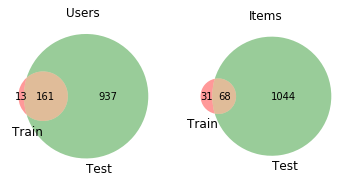

Recommender Setup : quarter
	 No of train_users in test   :  161
	 No of items_used            :  1052
		 No of existing_items_used   :  61
		 No of new_items_used        :  991

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3']
interactions_count :  36753
users_count        :  1405
items_count        :  1721

Generating Dataset :  dataset_2
Train quarter : ['2016Q1', '2016Q2']
	 interactions_count :  11541
	 users_count        :  1111
	 items_count        :  1143
Test  quarter : 2016Q3
	 interactions_count :  8311
	 users_count        :  1052
	 items_count        :  892
Test User Groups:
	 user_grp_1   477  users interacted with    1  <= no_of_items <  3
	 user_grp_2   285  users interacted with    3  <= no_of_items <  7
	 user_grp_3   290  users interacted with    7  <= no_of_items <  231
Train and test quarter
	 Common
		 users_count        :  758
		 items_count        :  314
	 Only_in_train
		 users

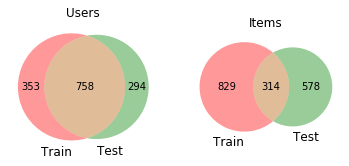

Recommender Setup : quarter
	 No of train_users in test   :  758
	 No of items_used            :  856
		 No of existing_items_used   :  281
		 No of new_items_used        :  575

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3', '2016Q4']
interactions_count :  43412
users_count        :  1549
items_count        :  2017

Generating Dataset :  dataset_3
Train quarter : ['2016Q1', '2016Q2', '2016Q3']
	 interactions_count :  19713
	 users_count        :  1405
	 items_count        :  1721
Test  quarter : 2016Q4
	 interactions_count :  4426
	 users_count        :  866
	 items_count        :  636
Test User Groups:
	 user_grp_1   334  users interacted with    1  <= no_of_items <  2
	 user_grp_2   284  users interacted with    2  <= no_of_items <  5
	 user_grp_3   248  users interacted with    5  <= no_of_items <  94
Train and test quarter
	 Common
		 users_count        :  722
		 items_count        :  340
	 Only

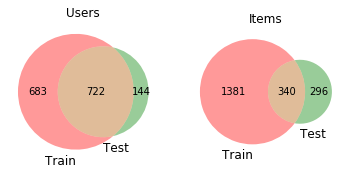

Recommender Setup : quarter
	 No of train_users in test   :  722
	 No of items_used            :  609
		 No of existing_items_used   :  316
		 No of new_items_used        :  293

********************************************************************************
elapsed_quarters   :  ['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1']
interactions_count :  47041
users_count        :  1644
items_count        :  2149

Generating Dataset :  dataset_4
Train quarter : ['2016Q1', '2016Q2', '2016Q3', '2016Q4']
	 interactions_count :  23997
	 users_count        :  1549
	 items_count        :  2017
Test  quarter : 2017Q1
	 interactions_count :  2272
	 users_count        :  764
	 items_count        :  319
Test User Groups:
	 user_grp_1   525  users interacted with    1  <= no_of_items <  3
	 user_grp_2   239  users interacted with    3  <= no_of_items <  69
Train and test quarter
	 Common
		 users_count        :  669
		 items_count        :  187
	 Only_in_train
		 users_count        :  880
		 items_

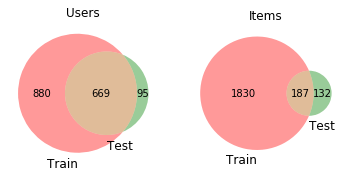

Recommender Setup : quarter
	 No of train_users in test   :  669
	 No of items_used            :  306
		 No of existing_items_used   :  174
		 No of new_items_used        :  132

********************************************************************************


In [118]:
generate_datasets(interactions_df = sorted_interactions_eng_meta_df,
                  period_col='quarter', user_col='personId', item_col='contentId',
                  datasets_dir='../train_test_datasets')

### Test Preferences for Intuition

In [45]:
# train_df = pd.read_csv('../train_test_datasets copy/dataset_1/train_2016Q1.csv')
# test_df = pd.read_csv('../train_test_datasets copy/dataset_1/test_2016Q2.csv')

In [46]:
# for preference_level in sorted(train_df['preference'].unique()):
#     print(preference_level, train_df[train_df['preference'] == preference_level]['eventType'].unique())


# 1.0 ['VIEW']
# 1.585 ['VIEW']
# 1.8074 ['BOOKMARK']
# 2.0 ['VIEW' 'LIKE']
# 2.1699 ['VIEW' 'BOOKMARK']
# 2.3219 ['VIEW' 'LIKE' 'FOLLOW']
# 2.4594 ['VIEW' 'BOOKMARK']
# 2.585 ['VIEW' 'LIKE']
# 2.7004 ['VIEW' 'LIKE' 'BOOKMARK']
# 2.8074 ['VIEW' 'LIKE' 'FOLLOW']
# 2.9069 ['BOOKMARK' 'VIEW' 'LIKE']
# 3.0 ['VIEW']
# 3.0875 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW']
# 3.1699 ['VIEW' 'LIKE' 'FOLLOW']

In [47]:
# for preference_level in sorted(test_df['preference'].unique()):
#     print(preference_level, test_df[test_df['preference'] == preference_level]['eventType'].unique())

# 1.0 ['VIEW']
# 1.585 ['VIEW' 'LIKE']
# 1.8074 ['BOOKMARK']
# 2.0 ['VIEW' 'LIKE']
# 2.1699 ['VIEW' 'BOOKMARK']
# 2.3219 ['LIKE' 'VIEW' 'FOLLOW']
# 2.4594 ['LIKE' 'BOOKMARK' 'VIEW']
# 2.585 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK']
# 2.7004 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW']
# 2.8074 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 2.9069 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW']
# 3.0 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 3.0875 ['BOOKMARK' 'VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 3.1699 ['VIEW' 'FOLLOW' 'LIKE' 'COMMENT CREATED' 'BOOKMARK']
# 3.2479 ['VIEW' 'BOOKMARK' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 3.3219 ['VIEW' 'COMMENT CREATED' 'LIKE' 'BOOKMARK' 'FOLLOW']
# 3.3923 ['VIEW' 'BOOKMARK' 'FOLLOW' 'LIKE' 'COMMENT CREATED']
# 3.4594 ['VIEW' 'FOLLOW' 'LIKE' 'COMMENT CREATED' 'BOOKMARK']
# 3.5236 ['VIEW' 'LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW']
# 3.585 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 3.6439 ['VIEW' 'BOOKMARK' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 3.7004 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW' 'BOOKMARK']
# 3.7549 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW' 'COMMENT CREATED']
# 3.8074 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 3.858 ['VIEW' 'COMMENT CREATED' 'BOOKMARK' 'FOLLOW' 'LIKE']
# 3.9069 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 3.9542 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE' 'BOOKMARK']
# 4.0 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.0875 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.1293 ['BOOKMARK' 'LIKE' 'VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.1699 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 4.2095 ['VIEW' 'LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW']
# 4.2479 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 4.2854 ['VIEW' 'LIKE' 'COMMENT CREATED' 'BOOKMARK' 'FOLLOW']
# 4.3219 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK']
# 4.3576 ['VIEW' 'BOOKMARK' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 4.3923 ['VIEW' 'COMMENT CREATED']
# 4.4263 ['VIEW' 'FOLLOW' 'BOOKMARK' 'LIKE' 'COMMENT CREATED']
# 4.4594 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.4919 ['VIEW' 'BOOKMARK' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 4.5236 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.585 ['VIEW' 'COMMENT CREATED']
# 4.6439 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 4.6724 ['LIKE' 'BOOKMARK']
# 4.7004 ['BOOKMARK' 'VIEW' 'LIKE']
# 4.7549 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.7814 ['VIEW' 'LIKE' 'BOOKMARK' 'FOLLOW' 'COMMENT CREATED']
# 4.8074 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.8329 ['LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW' 'VIEW']
# 4.8580000000000005 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 4.9542 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK' 'LIKE']
# 5.0444 ['VIEW' 'FOLLOW' 'COMMENT CREATED']
# 5.0875 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 5.1497 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK' 'LIKE']
# 5.2095 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 5.2479 ['VIEW' 'COMMENT CREATED' 'LIKE']
# 5.4094 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK' 'LIKE']
# 6.1085 ['BOOKMARK' 'LIKE']
# 6.1497 ['BOOKMARK']
# 7.8517 ['BOOKMARK' 'LIKE']

In [48]:
# train_df = pd.read_csv('../train_test_datasets copy/dataset_4/train_2016Q1_2016Q2_2016Q3_2016Q4.csv')
# test_df = pd.read_csv('../train_test_datasets copy/dataset_4/test_2017Q1.csv')

In [49]:
# for preference_level in sorted(train_df['preference'].unique()):
#     print(preference_level, train_df[train_df['preference'] == preference_level]['eventType'].unique())


# 1.0 ['VIEW']
# 1.585 ['VIEW' 'LIKE']
# 1.8074 ['BOOKMARK']
# 2.0 ['VIEW' 'LIKE']
# 2.1699 ['VIEW' 'BOOKMARK']
# 2.3219 ['VIEW' 'LIKE' 'FOLLOW']
# 2.4594 ['VIEW' 'BOOKMARK' 'LIKE']
# 2.585 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK']
# 2.7004 ['VIEW' 'LIKE' 'BOOKMARK' 'FOLLOW']
# 2.8074 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK']
# 2.9069 ['BOOKMARK' 'VIEW' 'LIKE' 'FOLLOW']
# 3.0 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 3.0875 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW' 'COMMENT CREATED']
# 3.1699 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK']
# 3.2479 ['VIEW' 'BOOKMARK' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 3.3219 ['VIEW' 'COMMENT CREATED' 'LIKE' 'BOOKMARK' 'FOLLOW']
# 3.3923 ['VIEW' 'BOOKMARK' 'FOLLOW' 'LIKE' 'COMMENT CREATED']
# 3.4594 ['VIEW' 'FOLLOW' 'LIKE' 'COMMENT CREATED' 'BOOKMARK']
# 3.5236 ['VIEW' 'LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW']
# 3.585 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 3.6439 ['VIEW' 'BOOKMARK' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 3.7004 ['VIEW' 'BOOKMARK' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 3.7549 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW' 'COMMENT CREATED']
# 3.8074 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 3.858 ['VIEW' 'COMMENT CREATED' 'BOOKMARK' 'FOLLOW' 'LIKE']
# 3.9069 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 3.9542 ['VIEW' 'FOLLOW' 'LIKE' 'BOOKMARK' 'COMMENT CREATED']
# 4.0 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 4.0444 ['VIEW' 'COMMENT CREATED' 'LIKE' 'BOOKMARK']
# 4.0875 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE' 'BOOKMARK']
# 4.1293 ['BOOKMARK' 'LIKE' 'VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.1699 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 4.2095 ['VIEW' 'LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW']
# 4.2479 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.2854 ['VIEW' 'LIKE' 'COMMENT CREATED' 'BOOKMARK' 'FOLLOW']
# 4.3219 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK']
# 4.3576 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW' 'COMMENT CREATED']
# 4.3923 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.4263 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK']
# 4.4594 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.4919 ['VIEW' 'BOOKMARK' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 4.5236 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.5546 ['VIEW' 'LIKE' 'BOOKMARK' 'FOLLOW']
# 4.585 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 4.6439 ['VIEW' 'COMMENT CREATED' 'LIKE' 'FOLLOW']
# 4.6724 ['LIKE' 'BOOKMARK']
# 4.7004 ['BOOKMARK' 'VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 4.7549 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.7814 ['VIEW' 'LIKE' 'BOOKMARK' 'FOLLOW' 'COMMENT CREATED']
# 4.8074 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 4.8329 ['LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW' 'VIEW']
# 4.8580000000000005 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 4.9542 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK' 'LIKE']
# 4.9773 ['VIEW' 'LIKE' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW']
# 5.0444 ['VIEW' 'FOLLOW' 'COMMENT CREATED']
# 5.0875 ['VIEW' 'COMMENT CREATED']
# 5.1699 ['VIEW' 'FOLLOW' 'COMMENT CREATED']
# 5.1898 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'BOOKMARK' 'LIKE']
# 5.2095 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 5.2479 ['VIEW' 'COMMENT CREATED' 'LIKE']
# 5.2854 ['VIEW']
# 5.4429 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'BOOKMARK' 'LIKE']
# 5.5546 ['VIEW']
# 6.1085 ['BOOKMARK' 'LIKE']
# 6.1497 ['BOOKMARK']
# 7.8517 ['BOOKMARK' 'LIKE']

In [50]:
# for preference_level in sorted(test_df['preference'].unique()):
#     print(preference_level, test_df[test_df['preference'] == preference_level]['eventType'].unique())


# 1.0 ['VIEW']
# 1.585 ['VIEW' 'LIKE']
# 1.8074 ['BOOKMARK']
# 2.0 ['VIEW' 'LIKE']
# 2.1699 ['VIEW' 'BOOKMARK']
# 2.3219 ['VIEW' 'LIKE' 'FOLLOW']
# 2.4594 ['VIEW' 'BOOKMARK']
# 2.585 ['VIEW' 'FOLLOW' 'LIKE']
# 2.7004 ['VIEW' 'BOOKMARK' 'LIKE']
# 2.8074 ['VIEW' 'LIKE' 'FOLLOW']
# 2.9069 ['VIEW' 'LIKE' 'BOOKMARK']
# 3.0 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW']
# 3.0875 ['VIEW' 'LIKE' 'BOOKMARK']
# 3.1699 ['VIEW' 'FOLLOW' 'COMMENT CREATED']
# 3.2479 ['VIEW' 'LIKE' 'FOLLOW' 'BOOKMARK']
# 3.3219 ['VIEW' 'COMMENT CREATED' 'FOLLOW']
# 3.4594 ['VIEW' 'LIKE' 'FOLLOW' 'COMMENT CREATED']
# 3.5236 ['VIEW' 'BOOKMARK' 'LIKE' 'FOLLOW']
# 3.585 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 3.6439 ['VIEW' 'LIKE' 'BOOKMARK' 'FOLLOW']
# 3.7004 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 3.7549 ['VIEW' 'BOOKMARK' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 3.8074 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 3.9069 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 4.0875 ['VIEW' 'FOLLOW' 'COMMENT CREATED' 'LIKE']
# 4.1293 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE' 'BOOKMARK']
# 4.1699 ['VIEW' 'BOOKMARK' 'COMMENT CREATED' 'FOLLOW' 'LIKE']
# 4.2479 ['VIEW' 'BOOKMARK' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 4.3219 ['VIEW' 'LIKE' 'COMMENT CREATED' 'FOLLOW']
# 4.3923 ['VIEW' 'COMMENT CREATED' 'FOLLOW' 'LIKE']